# MNSIT dataset from Tensorflow

In [68]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy import io as spio
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

Shapes:
train_images:(60000, 28, 28)
train_labels:(60000,)
test_images:(10000, 28, 28)
test_labels:(10000,)


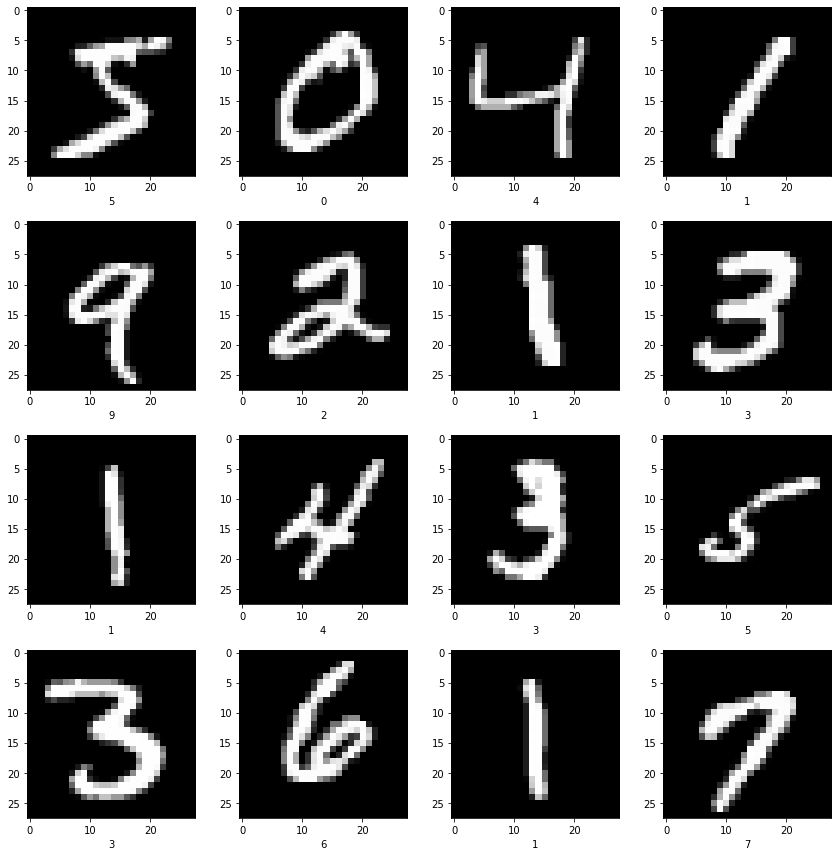

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

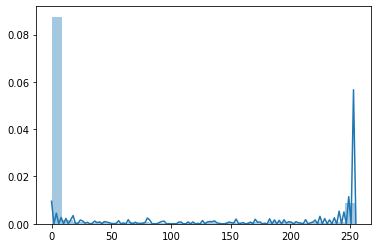

In [69]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

print(f'Shapes:\ntrain_images:{train_images.shape}\ntrain_labels:{train_labels.shape}\ntest_images:{test_images.shape}\ntest_labels:{test_labels.shape}')
plt.figure(figsize=(12,12))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.tight_layout()
#     plt.xticks(range(0,28,2))
#     plt.yticks(range(0,28,2))
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(train_labels[i])
#     plt.grid()
plt.show()

np.set_printoptions(linewidth=120)
sb.distplot(train_images[0].reshape(28*28))
print(train_images[0])

# EMNIST data 

from https://www.nist.gov/itl/products-and-services/emnist-dataset

code adapted from https://github.com/j05t/emnist/blob/master/emnist.ipynb

refernece https://arxiv.org/pdf/1702.05373v1.pdf

Shapes:
x_train:(697932, 28, 28)
y_train:(697932,)
x_test:(116323, 28, 28)
y_test:(116323,)


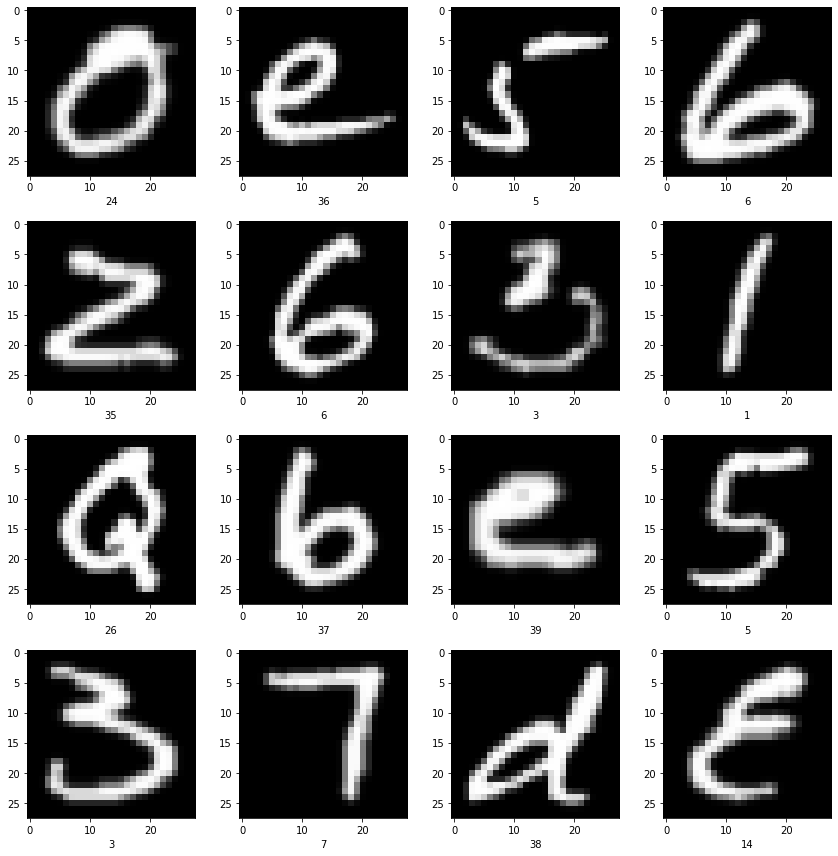

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   4   4   4   4   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  10  77 113 127 127 114  81  20   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   3  10  79 127 220 243 250 250 245 229 110   4   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  20  47 159 207 247 253 254 254 253 248 139  13   5   3   2   0   0   0]
 [  0   0   0   0   0   0   0   0   0   8 122 194 247 253 254 254 254 254 254 254 222 135 110  77  44   1   0   0]
 [  0   0   0   0   0   0   0   0   2  21 170 230 254 254 255 254 254 254 253 254 247 203 154  78  45   1   0   0]
 [  0   0   0   0   0   0   0   0   6  40 216 249 254 254 252 250 232 210 190 22

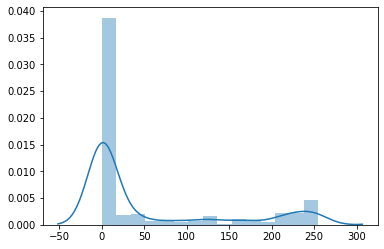

In [70]:
emnist = spio.loadmat("./emnist-bymerge.mat")

# load training dataset
x_train = emnist["dataset"][0][0][0][0][0][0]
x_train = x_train.astype(np.float32)
# load training labels
y_train = emnist["dataset"][0][0][0][0][0][1]

# load test dataset
x_test = emnist["dataset"][0][0][1][0][0][0]
x_test = x_test.astype(np.float32)
# load test labels
y_test = emnist["dataset"][0][0][1][0][0][1]

# reshape using matlab order
x_train = x_train.reshape(x_train.shape[0], 28, 28, order="A")
y_train = y_train.reshape(y_train.shape[0],)
x_test = x_test.reshape(x_test.shape[0], 28, 28, order="A")
y_test = y_test.reshape(y_test.shape[0])

print(f'Shapes:\nx_train:{x_train.shape}\ny_train:{y_train.shape}\nx_test:{x_test.shape}\ny_test:{y_test.shape}')

plt.figure(figsize=(12,12))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.tight_layout()
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(y_train[i])
plt.show()

np.set_printoptions(linewidth=120)
sb.distplot(x_train[0].reshape(28*28))
print(x_train[0].astype('int'))

m:(11612, 1)
[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   4   4   0   0   0   0   0   0   0   0   0   0 

/Users/sinan/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


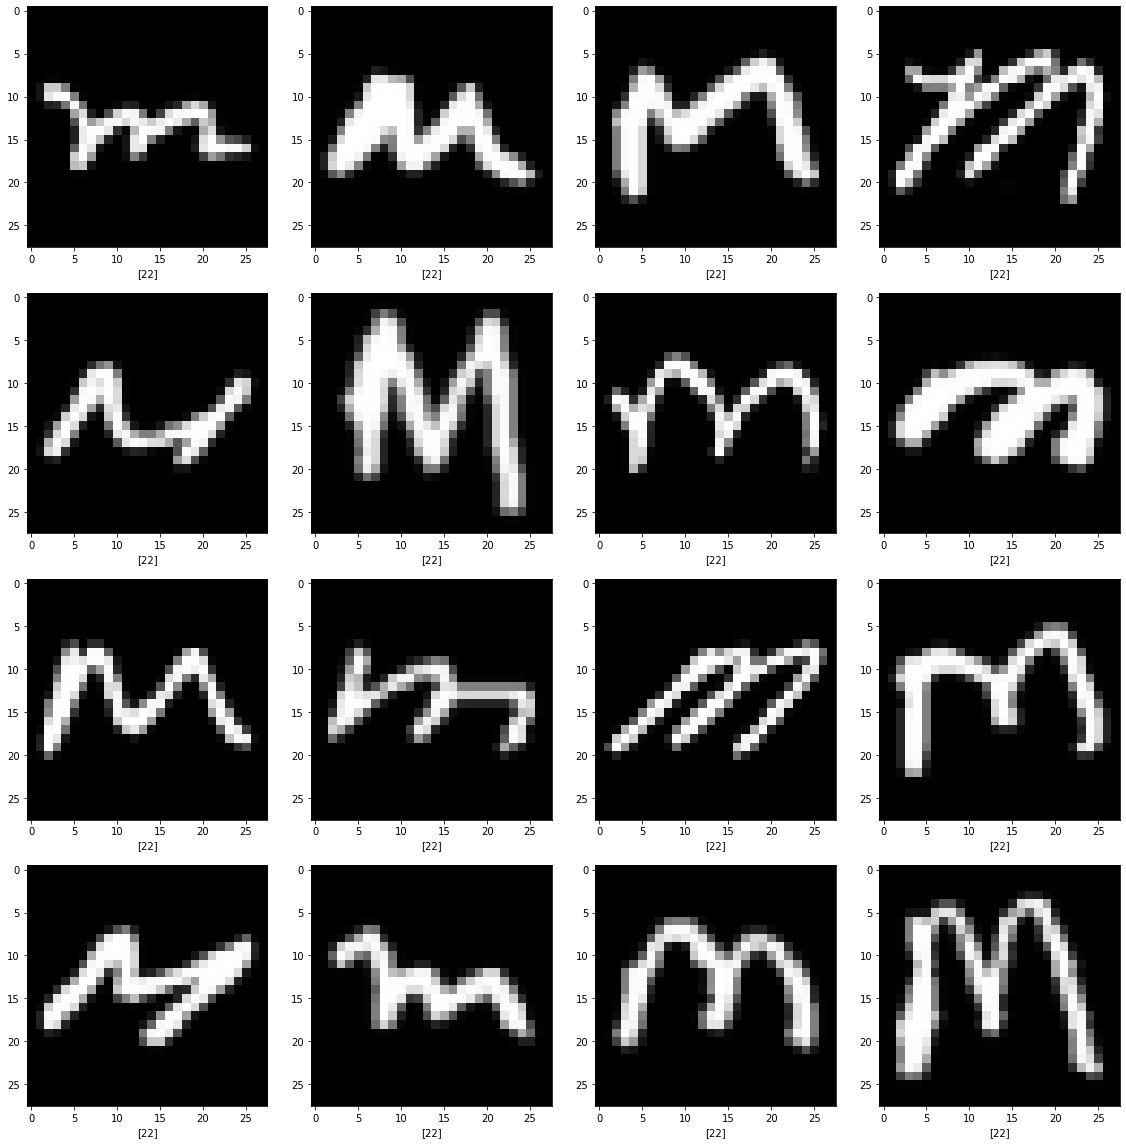

m:(1984, 1)
[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   2   9  27   7   0  

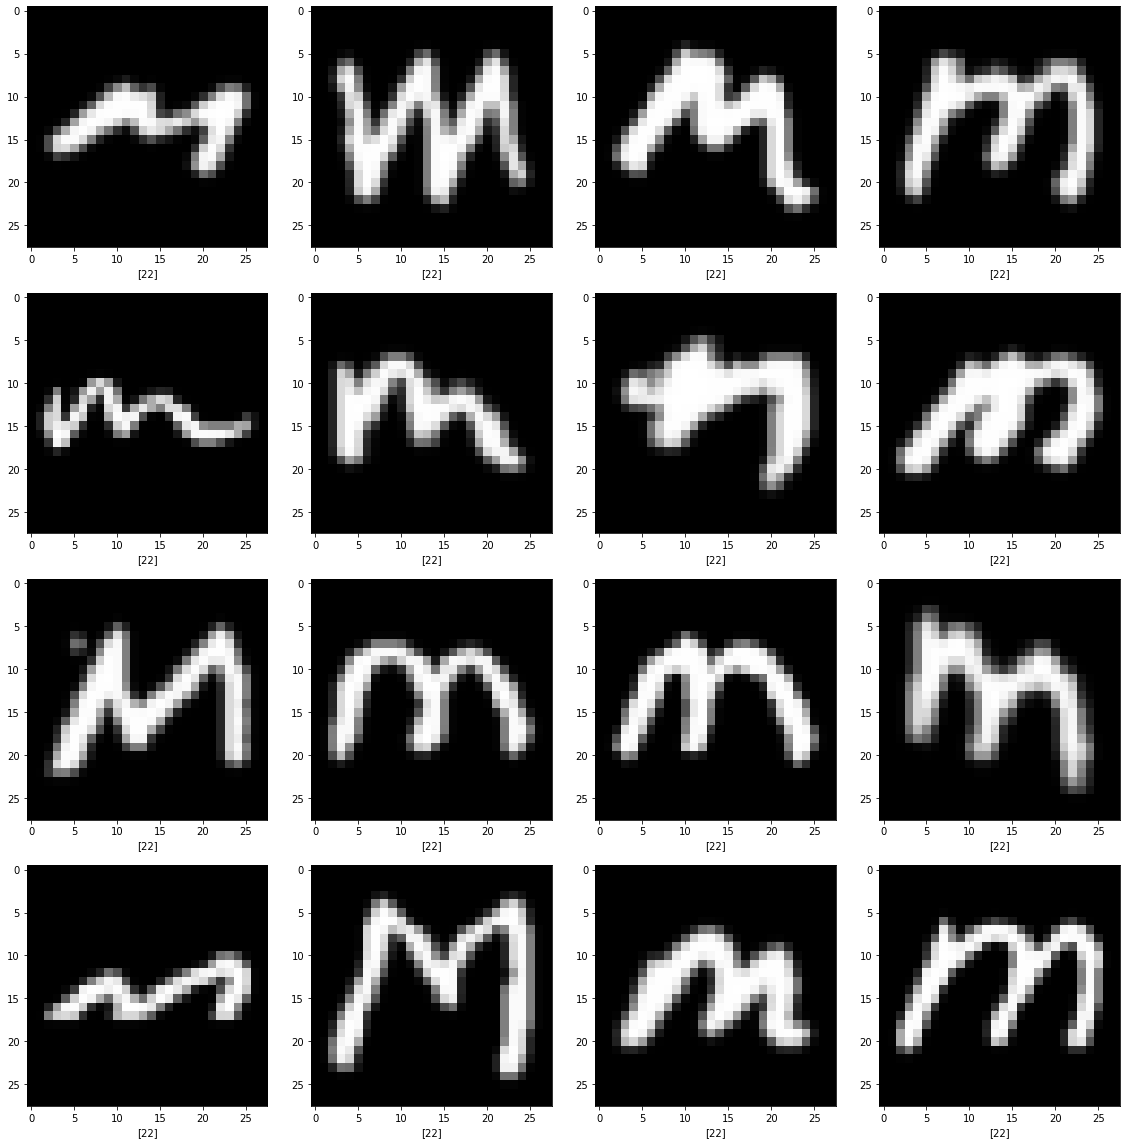

In [71]:
m_letter_train = np.argwhere(y_train==22)  # letter 'm' and 'M'
print(f'm:{m_letter_train.shape}')
# digits = np.argwhere(y_train<=9)  # digits
# print(f'#:{digits.shape}')

print(x_train[m_letter_train[0]].astype('int'))

plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.tight_layout()
    plt.imshow(x_train[m_letter_train[i]][0], cmap='gray')
    plt.xlabel(y_train[m_letter_train[i]])
plt.show();

m_letter_test = np.argwhere(y_test==22)  # letter 'm' and 'M'
print(f'm:{m_letter_test.shape}')

print(x_test[m_letter_test[0]].astype('int'))

plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.tight_layout()
    plt.imshow(x_test[m_letter_test[i]][0], cmap='gray')
    plt.xlabel(y_test[m_letter_test[i]])
plt.show();

# Add M/m letter to the training/testing MNST data sets

In [72]:
#combine MNIST and EMNIST('M') datasets
tmp = x_train[m_letter_train]
tmp = tmp.reshape(tmp.shape[0], 28, 28)[:6000]
print('m_train_x:',tmp.shape)
new_train_images = np.concatenate((train_images,tmp))
print('All_train_x:',new_train_images.shape)

tmp = y_train[m_letter_train]
tmp = tmp.reshape(tmp.shape[0])[:6000]
print('m_train_y:',tmp.shape)
new_train_labels = np.concatenate((train_labels,tmp))
print('All_train_y:',new_train_labels.shape)

tmp = x_test[m_letter_test]
tmp = tmp.reshape(tmp.shape[0], 28, 28)[:1000]
print('m_test_x:',tmp.shape)
new_test_images = np.concatenate((test_images,tmp))
print('All_test_x:',new_test_images.shape)

tmp = y_test[m_letter_test]
tmp = tmp.reshape(tmp.shape[0])[:1000]
print('m_test_y:',tmp.shape)
new_test_labels = np.concatenate((test_labels,tmp))
print('All_test_y:',new_test_labels.shape)


#shuffle training set
i=np.array(range(new_train_images.shape[0]))
np.random.shuffle(i)
new_train_images = new_train_images[i]
new_train_labels = new_train_labels[i]

m_train_x: (6000, 28, 28)
All_train_x: (66000, 28, 28)
m_train_y: (6000,)
All_train_y: (66000,)
m_test_x: (1000, 28, 28)
All_test_x: (11000, 28, 28)
m_test_y: (1000,)
All_test_y: (11000,)


In [74]:
new_train_labels = np.where(new_train_labels==22,10,new_train_labels)
new_test_labels = np.where(new_test_labels==22,10,new_test_labels)

train set


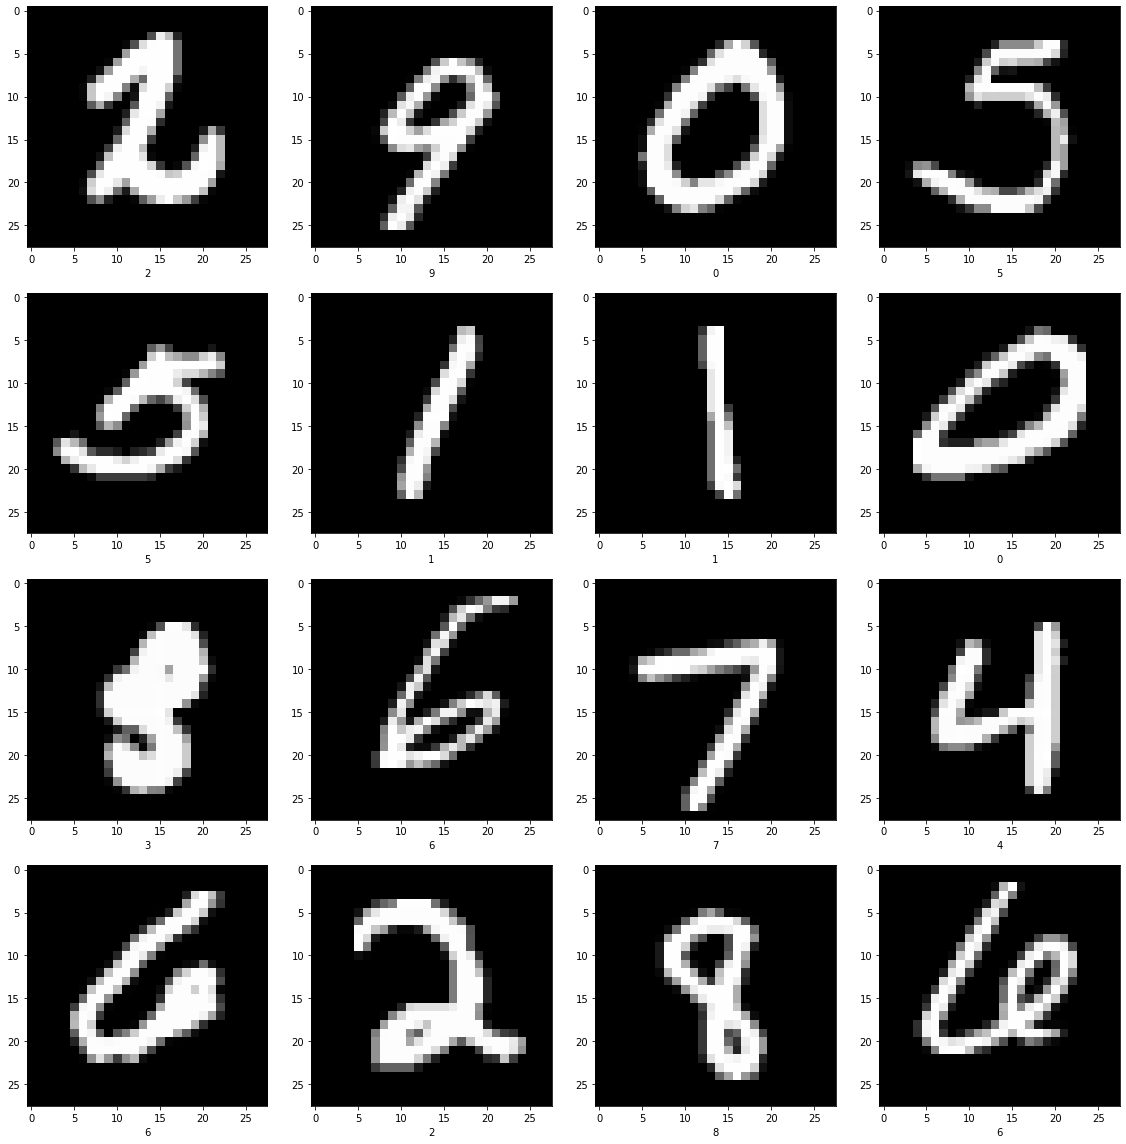

test set


/Users/sinan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


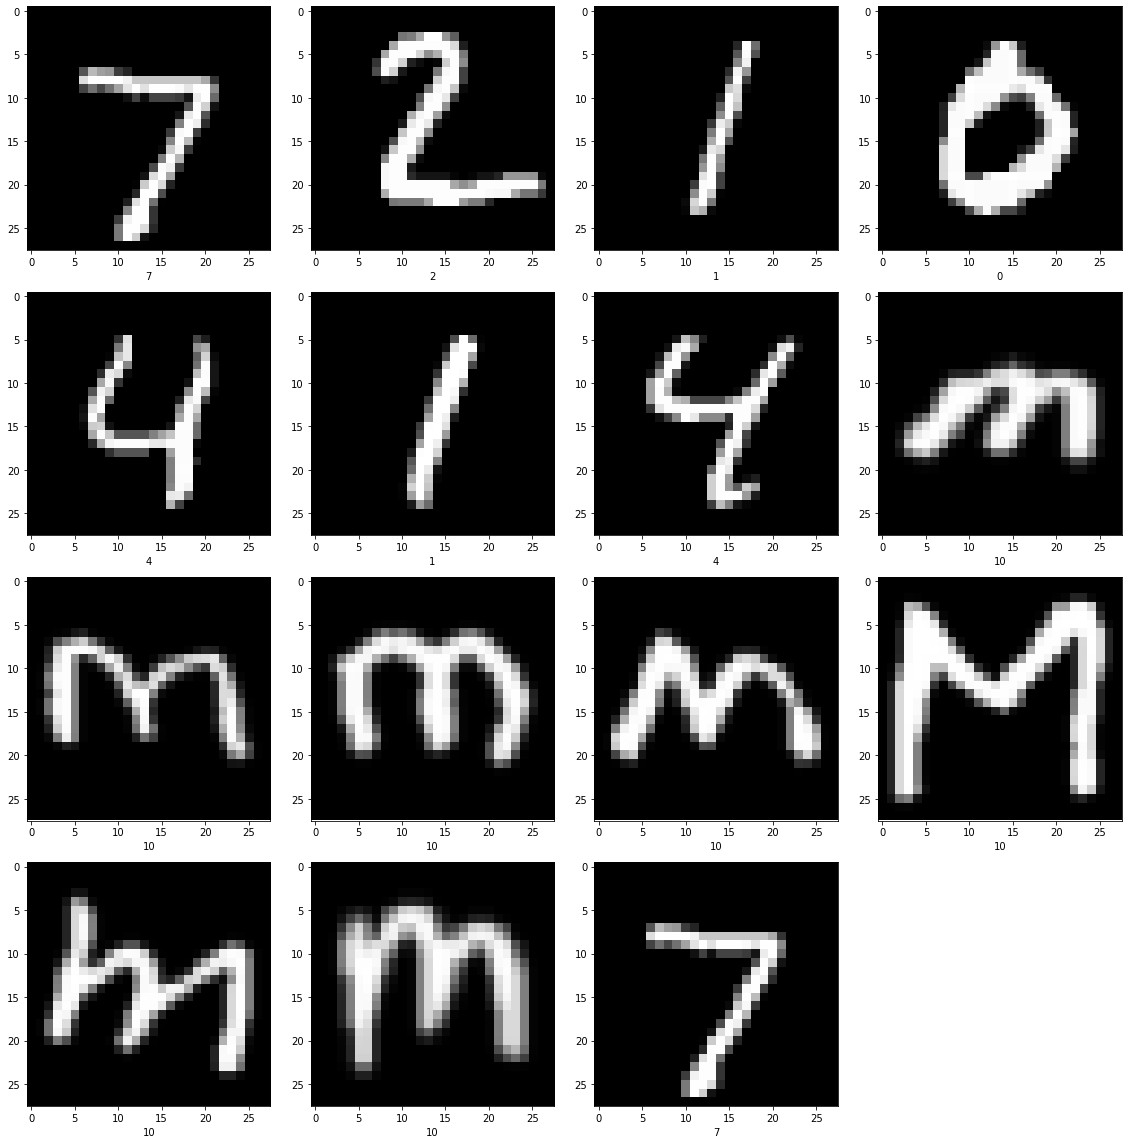

In [75]:
print('train set')
plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.tight_layout()
    plt.imshow(new_train_images[i], cmap='gray')
    plt.xlabel(new_train_labels[i])
plt.show();

print('test set')
plt.figure(figsize=(16,16))
for i in range(8):
    plt.subplot(4, 4, i+1)
    plt.tight_layout()
    plt.imshow(new_test_images[i], cmap='gray')
    plt.xlabel(new_test_labels[i])
for i in range(8):
    plt.subplot(4, 4, 16-i-1)  # problem with indexing here not showing the plot correctly. not worth the time to fix
    plt.tight_layout()
    plt.imshow(new_test_images[-i], cmap='gray')
    plt.xlabel(new_test_labels[-i])
plt.show();

In [77]:
#save new dataset
import h5py
hf = h5py.File('MNIST_M_dataset.h5', 'w')
hf.create_dataset('train_images', data=new_train_images)
hf.create_dataset('train_labels', data=new_train_labels)
hf.create_dataset('test_images', data=new_test_images)
hf.create_dataset('test_labels', data=new_test_labels)
hf.close()